In [1]:
from pathlib import Path
import xarray as xr

-1


In [2]:
basepath = Path("/workspace/data/africa_v0.3/train/")

minicube_paths = list(basepath.glob("*/*.nc"))

In [3]:
minicube = xr.open_dataset(minicube_paths[4])
minicube.keys

<bound method Mapping.keys of <xarray.Dataset>
Dimensions:               (time: 450, lon: 128, lat: 128, time_clim: 12)
Coordinates:
  * time                  (time) datetime64[ns] 2017-03-30 ... 2018-06-22
    sentinel:product_id   float32 ...
  * lon                   (lon) float64 14.57 14.57 14.57 ... 14.58 14.58 14.58
  * lat                   (lat) float64 -6.992 -6.992 -6.992 ... -7.004 -7.004
  * time_clim             (time_clim) datetime64[ns] 1970-01-15 ... 1970-12-15
Data variables: (12/72)
    s2_avail              (time) float32 ...
    s2_B02                (time, lat, lon) float32 ...
    s2_B03                (time, lat, lon) float32 ...
    s2_B04                (time, lat, lon) float32 ...
    s2_B05                (time, lat, lon) float32 ...
    s2_B06                (time, lat, lon) float32 ...
    ...                    ...
    sg_soc_sub_mean       (lat, lon) float32 ...
    geom_cls              (lat, lon) float32 ...
    s2_SCL                (time, lat, lon) f

450


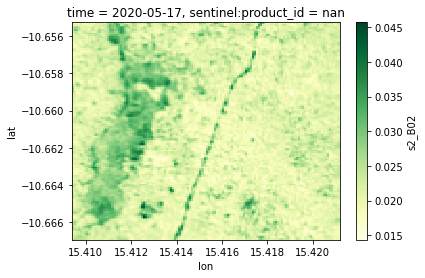

In [6]:
import matplotlib.pyplot as plt
import matplotlib.colors as clr
cmap_veg = clr.LinearSegmentedColormap.from_list('veg', ['#ffffe5','#f7fcb9','#d9f0a3','#addd8e','#78c679','#41ab5d','#238443','#006837','#004529'])
minicube = xr.open_dataset(minicube_paths[1])
t_max = len(minicube.time.values)
print(t_max)


minicube.s2_B02.isel(time=t_max - 1).plot(cmap=cmap_veg)

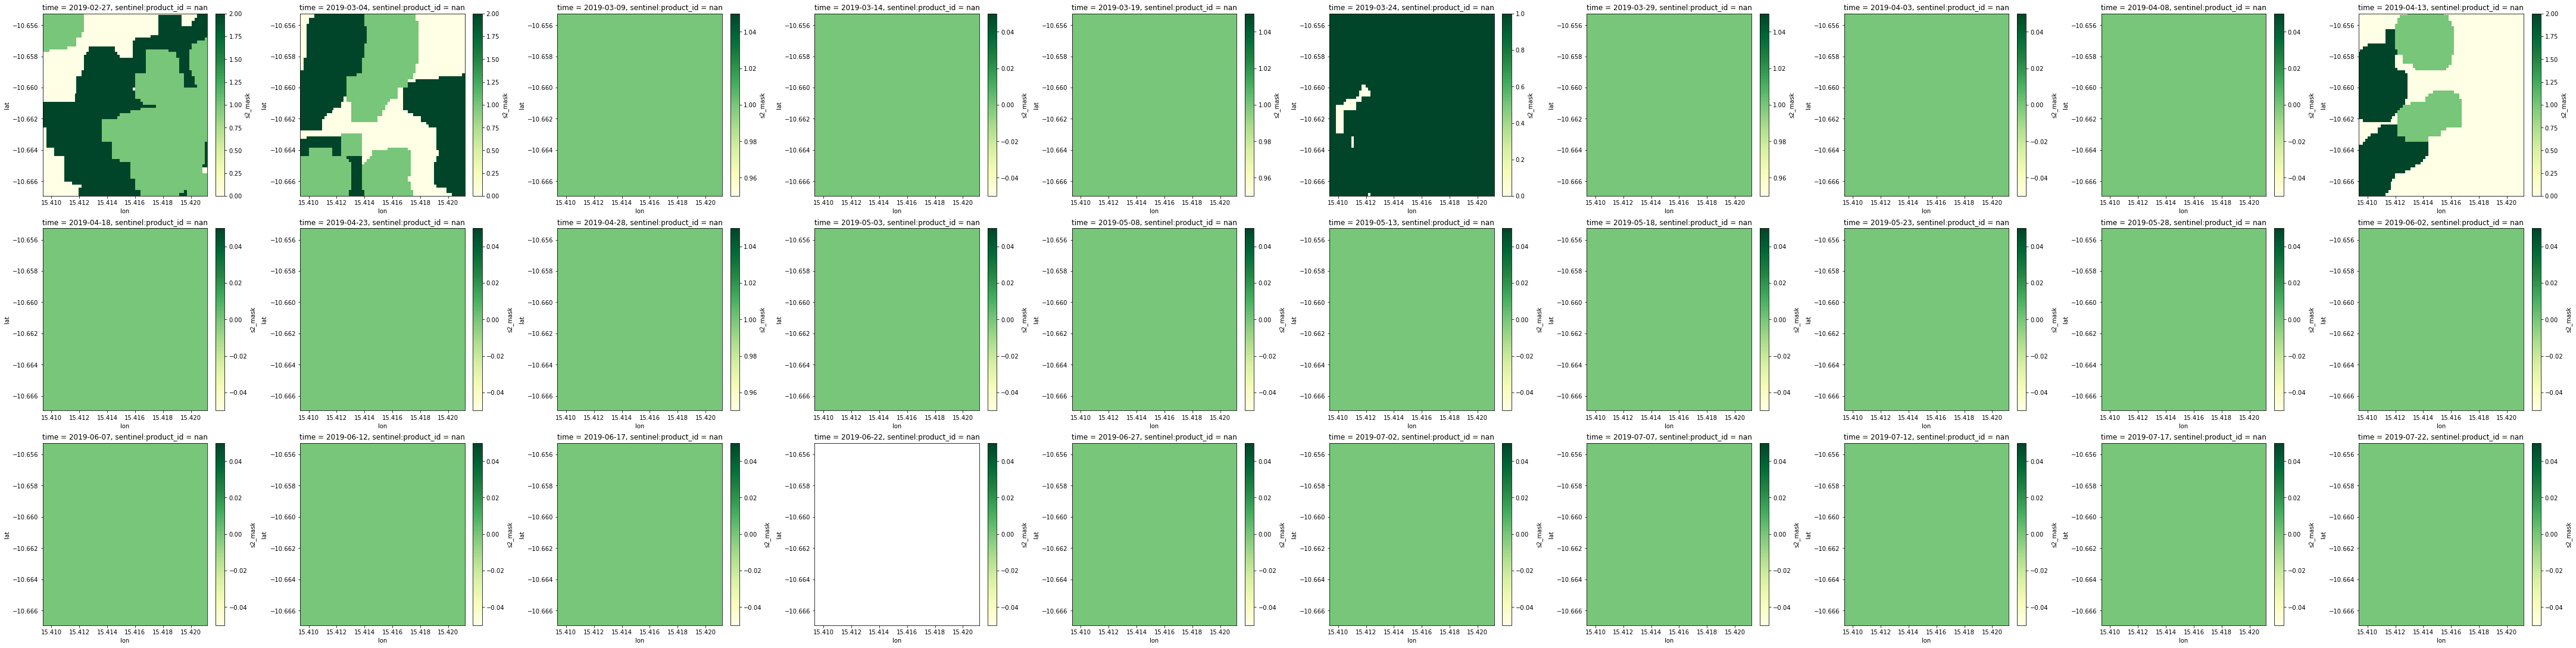

In [15]:
fig, axes = plt.subplots(nrows=3, ncols=10, constrained_layout=True, figsize=(60, 15))

t= 4
for i in range(3):
    for j in range(10):
        minicube.s2_mask.isel(time=t).plot(cmap=cmap_veg, ax=axes[i,j])
        t += 5 # non gap filled, a lot of nan values

plt.draw()


In [22]:
minicube.s2_avail

<xarray.DataArray 's2_avail' (time: 450)>
array([nan, nan, nan, ..., nan, nan,  1.], dtype=float32)
Coordinates:
  * time                 (time) datetime64[ns] 2019-02-23 ... 2020-05-17
    sentinel:product_id  float32 nan

In [44]:

print(minicube.data_vars.keys())

KeysView(Data variables:
    s2_avail              (time) float32 ...
    s2_B02                (time, lat, lon) float32 ...
    s2_B03                (time, lat, lon) float32 ...
    s2_B04                (time, lat, lon) float32 ...
    s2_B05                (time, lat, lon) float32 ...
    s2_B06                (time, lat, lon) float32 ...
    s2_B07                (time, lat, lon) float32 ...
    s2_B8A                (time, lat, lon) float32 ...
    s1_avail              (time) float32 ...
    s1_vv                 (time, lat, lon) float32 ...
    s1_vh                 (time, lat, lon) float32 ...
    era5land_t2m_mean     (time) float32 ...
    era5land_pev_mean     (time) float32 ...
    era5land_slhf_mean    (time) float32 ...
    era5land_ssr_mean     (time) float32 ...
    era5land_sp_mean      (time) float32 ...
    era5land_sshf_mean    (time) float32 ...
    era5land_e_mean       (time) float32 ...
    era5land_tp_mean      (time) float32 ...
    era5land_t2m_min      (tim